# NHOM 4 - TT_XLA

## Chương 4: ĐẶC TRƯNG CỦA ẢNH VÀ BÀI TOÁN NHẬN DIỆN

> THÀNH VIÊN:
- Võ Minh Thuận    - 21161366
- Trần Thị Xuân Hy - 21161323
- Lê Quang Thương  - 21161367

### MỤC TIÊU 

Trong chương này, người học sẽ thảo luận về các đặc trưng của ảnh và áp dụng các đặc trưng cho bài toán nhận điện. Các đặc trưng được thảo luận trong chương này gồm có đặc trưng về cạnh, đặc trưng về góc. Bài toán nhận diện được thảo luận và bài toán nhận diện khuôn mặt. Cuối cùng, các khối rời sẽ được kết hợp với nhau để tạo thành một ứng dụng bảo vệ danh tính cá nhân trên mạng xã hội. Chi tiết các phần được liệt kê như sau:
- Đặc trưng về cạnh và ứng dụng
- Đặc trưng về góc và ứng dụng
- Phát hiện khuôn mặt
- Ứng dụng bảo vệ danh tính

### NHIỆM VỤ NGƯỜI HỌC

Thực hiện đầy đủ các câu hỏi trong phần này trước khi đến lớp:
- 1> Hãy trình bày kỹ thuật rút trích đặc trưng bằng bộ lọc Canny?
- 2> Hãy trình bày kỹ thuật rút trích đặc trưng phát hiện góc?
- 3> Hãy trình bày khái miện về đối tượng và lập trình hướng đối tượng?
- 4> Định nghĩa về bài toán phát hiện khuôn mặt?
- 5> Trình bày cách đọc một tập tin video hoặc kết nối với camera sử dụng thư viện OpenCV.

Khai báo các thư viện cần thiết cho chương này.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray

plt.rcParams['figure.figsize'] = (10, 8)

- Khởi tạo show_image ( hiển thị ) có chức năng là hiển thị hình ảnh với tiêu đề được truyền vào không mặc định là Image
- KHởi tạo plot_comparision( biểu đồ so sánh) có chức năng là hiển thị 2 hình ảnh trên cùng 1 hàng để giúp so sánh 2 hình ảnh một cách chi tiết.
- plt.subplots là tạo 2 vị trí trên cùng 1 hàng với tham số đầu vào là ncols=2 kích thước là 10x8

In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

Bài 4.1 Tìm cạnh với thuật toán Canny
- Câu hỏi: Trong bài tập này, xác định các hình dạng trong hình quả bưởi bằng cách phát hiện các cạnh, sử dụng thuật toán Canny.

- Hai dòng đầu là khai báo thư viện sử dụng cho bài
- imread là đọc ảnh từ đường dẫn có thêm [:,:,:3] là lấy cả 3 kênh màu
- rgb2gray là chuyển đổi ảnh màu thành ảnh xám
- canny() là hàm phát hiện cạnh dùng thuật toán canny
- plot_comparision là hàm để hiển thị ảnh ban đầu và ảnh sau khi dùng thuật toán canny để so sánh

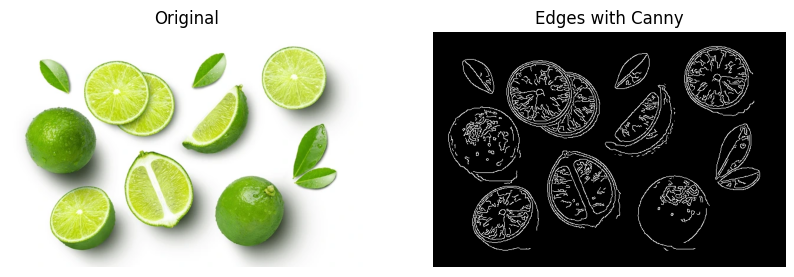

In [3]:
from skimage.feature import canny
from skimage import color

grapefruit = imread('./imgs/img_bt_4.1_2.png')[:, :, :3]
# Convert image to grayscale
grapefruitb = rgb2gray(grapefruit)

# Apply canny edge detector
canny_edges = canny(grapefruitb)

# Show resulting image
plot_comparison(grapefruit, canny_edges, "Edges with Canny")

Bài tập 4.2: Khảo sát ảnh hưởng của việc lọc nhiễu lên bộ lọc phát hiện cạnh
- Câu hỏi: Hãy thực hiện lại yêu cầu của bài 1. Tuy nhiên hãy thêm phần xử lý lọc nhiễu trước khi phát hiện cạnh. Sử dụng bộ lọc Gaussian với các mức độ làm mờ khác nhau  để làm cho ảnh mượt mà hơn thông qua cách  điều khiển giá trị tham số sigma.

- canny(img,sigma=1.8) có chức năng là dùng thuật toán canny đẻ phát hiện cạnh cho ảnh img với tham số sigma bằng 1.8 ()

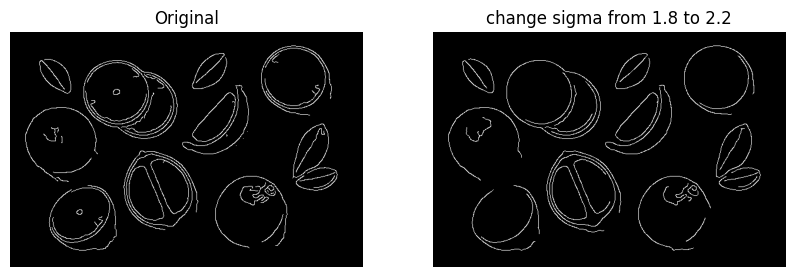

In [4]:
edges_1_8 = canny(grapefruitb, sigma=1.8)

# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(grapefruitb, sigma=2.2)

# Show resulting image
plot_comparison(edges_1_8, edges_2_2, 'change sigma from 1.8 to 2.2')

Bài tập 4.3: Phát hiện góc bằng bộ lọc Harris
- Câu hỏi: Tìm các góc của tòa nhà sử dụng phát hiện góc Harris. Sử dụng các hàm show_image() và show_image_with_corners() đã được cho trước. Các hàm của thư viện color cũng được khai báo để chuyển ảnh sang ảnh xám.

In [5]:
def show_image_with_corners(image, coords, title="Corners detected"):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
    plt.axis('off')

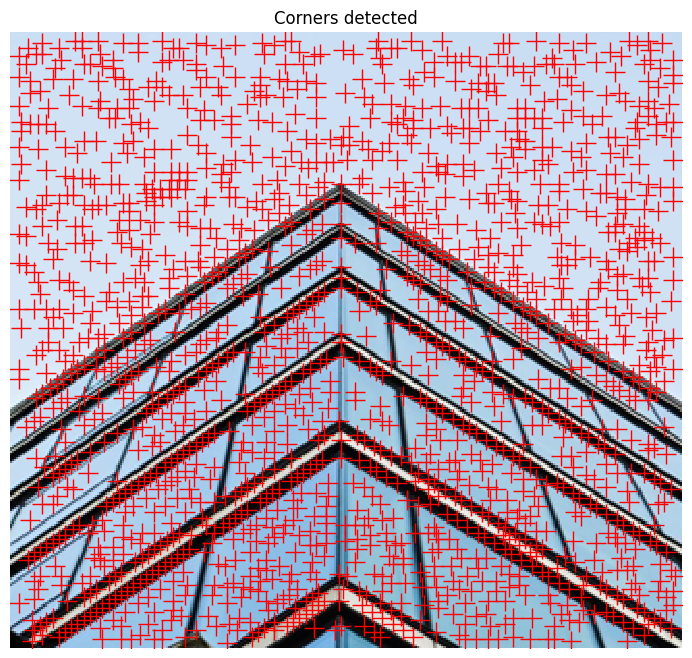

In [6]:
from skimage.feature import corner_harris, corner_peaks

building_image = imread('./imgs/img_bt_4.3_1.png')[:, :, :3]

# Convert image from RGB to grayscale
building_image_gray = rgb2gray(building_image)

# Apply the detector to measure the possible corners
measure_image = corner_harris(building_image_gray)

# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image, min_distance=2)

# Show original and resulting image with corners detected
show_image(building_image, 'Original')
show_image_with_corners(building_image, coords)

Bài tập 4.4: Khảo sát ảnh hưởng của tham số min_distance trong việc phát hiện góc
- Câu hỏi: Trong bài tập này, hãy khảo sát ảnh hưởng của tham số điều khiển min_distance của hàm corner_peaks() trong việc phát hiện các góc đối tượng trong của ảnh. Các hàm show_image(), show_image_with_corners() và các thư viện bắt buộc đã được khai báo trước trước cho bài tập này.

In [7]:

coords_w_min_2 = corner_peaks(measure_image, min_distance=2)
print("With a min_distance set to 2, we detect a total",
      len(coords_w_min_2), "corners in the image.")

# Find the peaks with a min distance of 40 pixels
coords_w_min_40 = corner_peaks(measure_image, min_distance=40)
print('With a min_distance set to 40, we detect a total',
      len(coords_w_min_40), 'corners in the image.')


With a min_distance set to 2, we detect a total 1546 corners in the image.
With a min_distance set to 40, we detect a total 5 corners in the image.


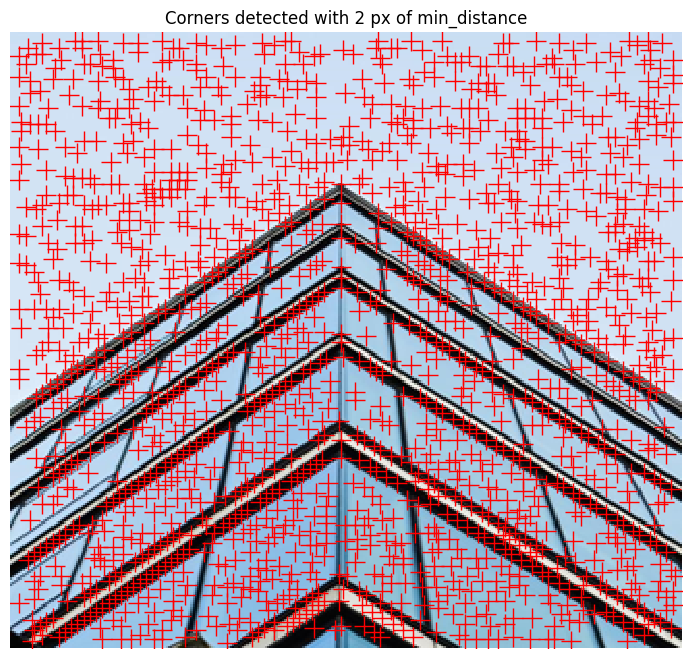

In [8]:
show_image_with_corners(building_image, coords_w_min_2,
                        "Corners detected with 2 px of min_distance")

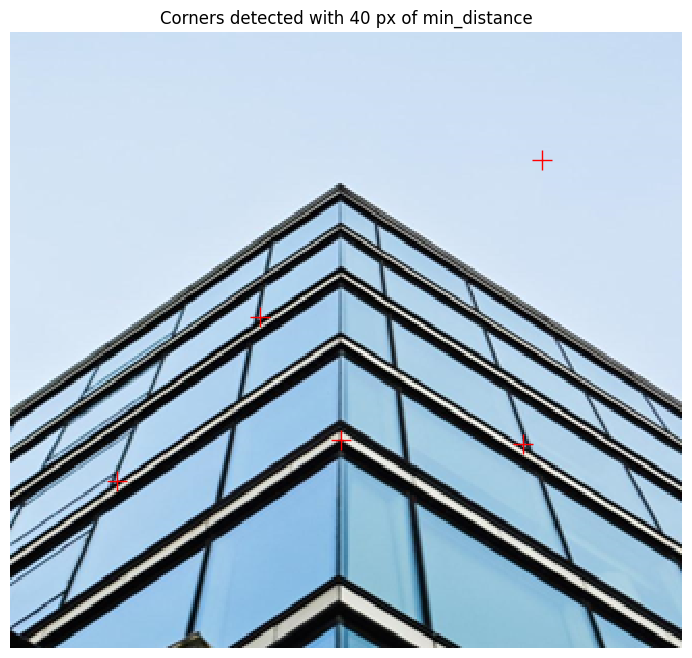

In [9]:
show_image_with_corners(building_image, coords_w_min_40,
                        "Corners detected with 40 px of min_distance")

Bài tập 4.5: Nhận diện khuôn mặt
- Câu hỏi: Kiểm tra xem có một người hiện diện hay không trong ảnh được chụp vào ban đêm.

In [10]:
import matplotlib.patches as patches


def crop_face(result, detected, title="Face detected"):
    for d in detected:
        print(d)
        rostro = result[d['r']:d['r']+d['width'], d['c']:d['c']+d['height']]

        plt.figure(figsize=(8, 6))
        plt.imshow(rostro)
        plt.title(title)
        plt.axis('off')
        plt.show()


def show_detected_face(result, detected, title="Face image"):
    plt.figure()
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:

        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2)
        )
    plt.show()
    crop_face(result, detected)

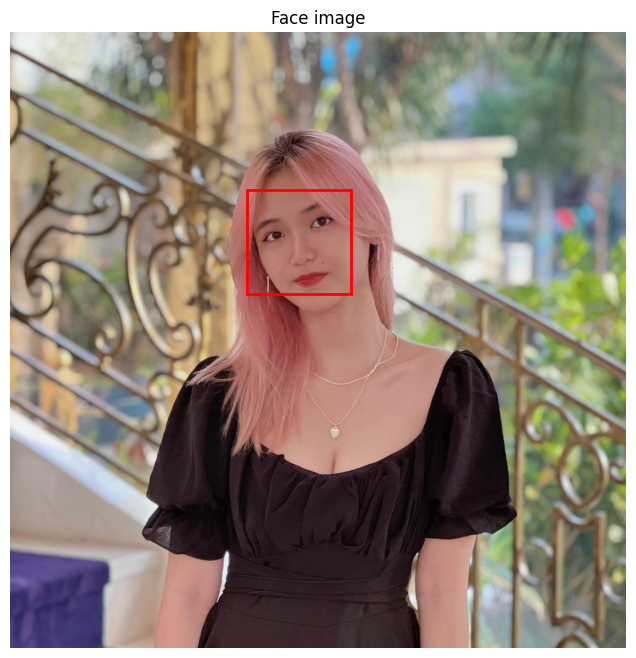

{'r': 526, 'c': 789, 'width': 345, 'height': 345}


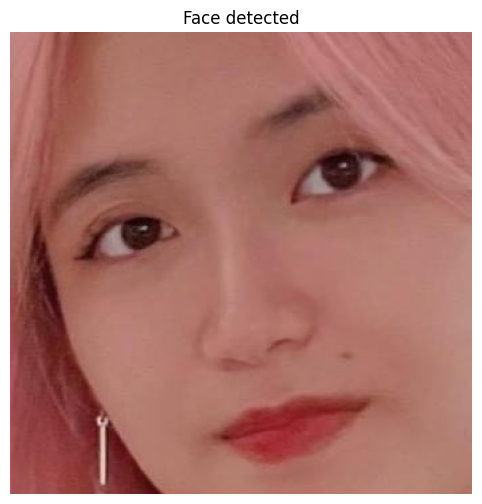

In [11]:
from skimage import data
from skimage.feature import Cascade

night_image = imread("./imgs/img_bt_4.5_3.png")[:, :, :3]

# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(img=night_image, scale_factor=1.2,
                                       step_ratio=1, min_size=(125, 125), max_size=(500, 500))

# Show the detected faces
show_detected_face(night_image, detected)

Bài tập 4.6: Nhận dạng nhiều khuôn mặt
- Câu hỏi: Trong bài tập này, hãy phát hiện nhiều khuôn mặt trong một ảnh và hiển thị chúng riêng lẻ.

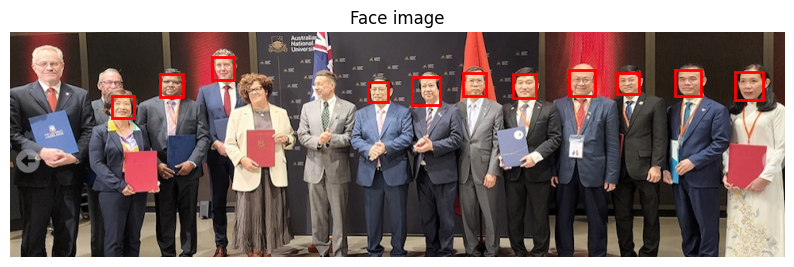

{'r': 32, 'c': 254, 'width': 28, 'height': 28}


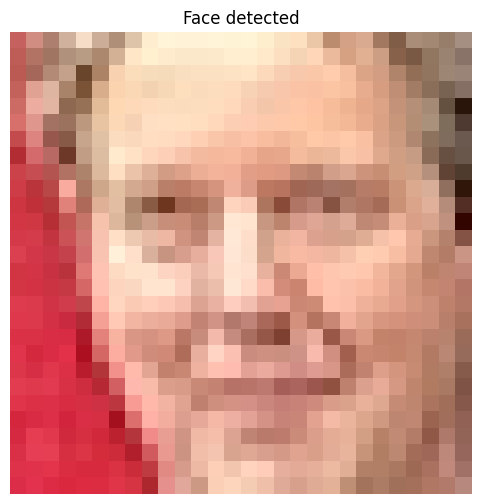

{'r': 48, 'c': 838, 'width': 33, 'height': 33}


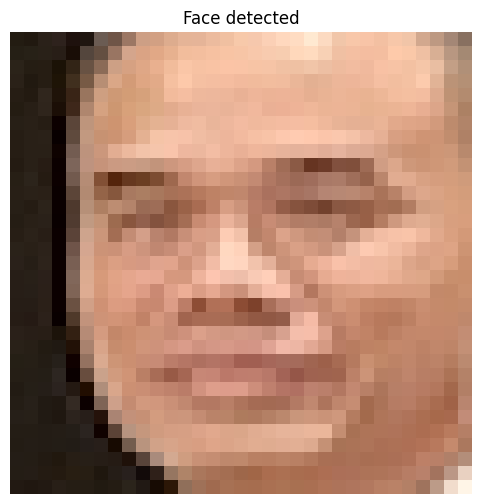

{'r': 48, 'c': 704, 'width': 33, 'height': 33}


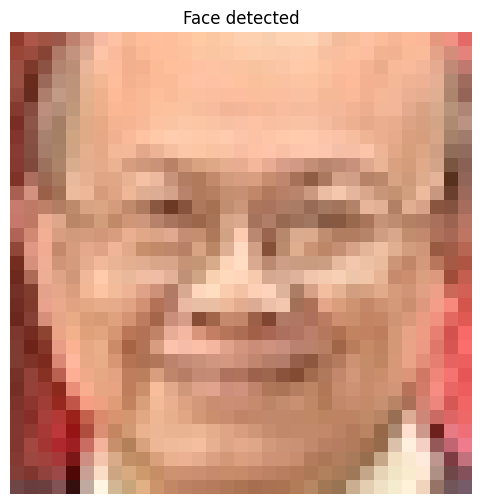

{'r': 51, 'c': 765, 'width': 27, 'height': 27}


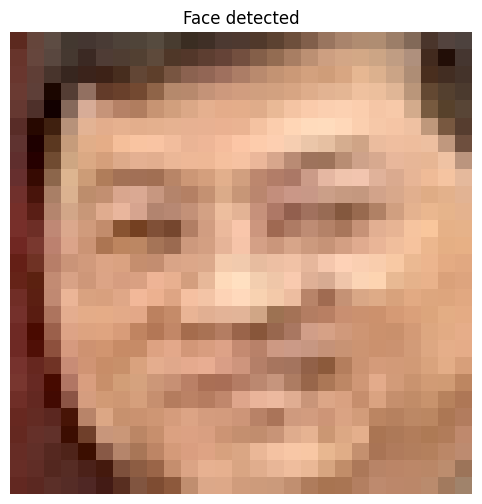

{'r': 51, 'c': 571, 'width': 29, 'height': 29}


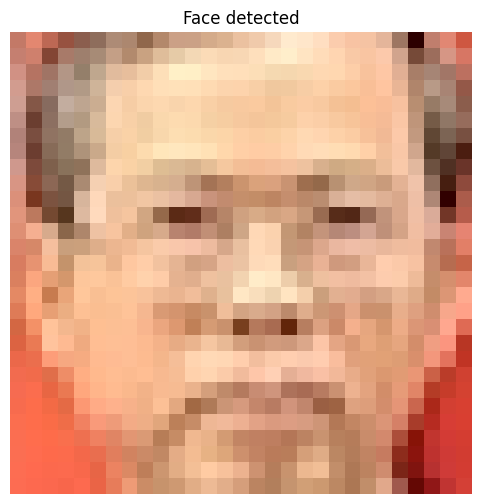

{'r': 53, 'c': 188, 'width': 29, 'height': 29}


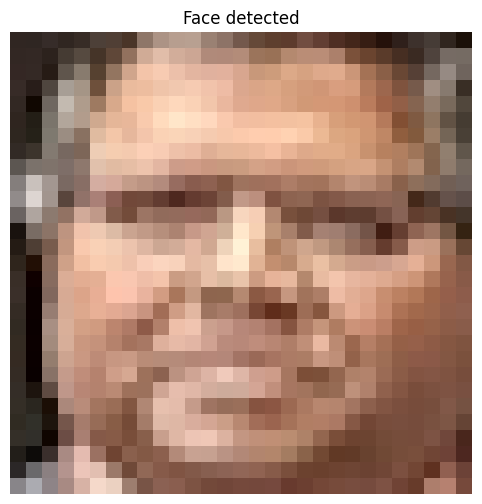

{'r': 53, 'c': 633, 'width': 30, 'height': 30}


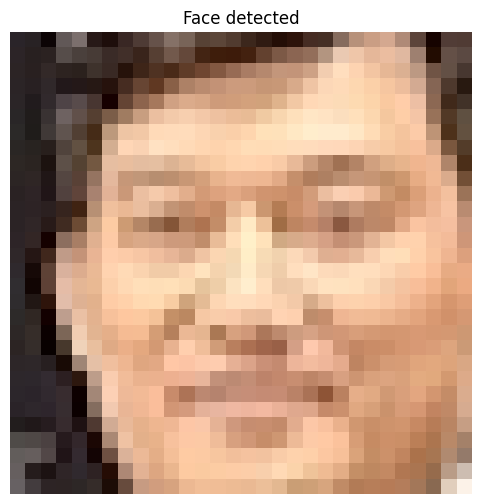

{'r': 56, 'c': 506, 'width': 36, 'height': 36}


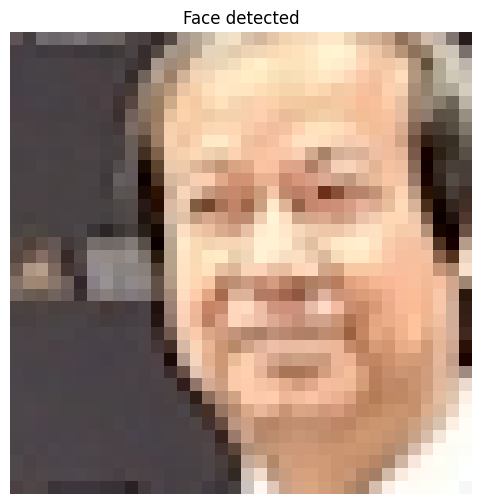

{'r': 63, 'c': 451, 'width': 25, 'height': 25}


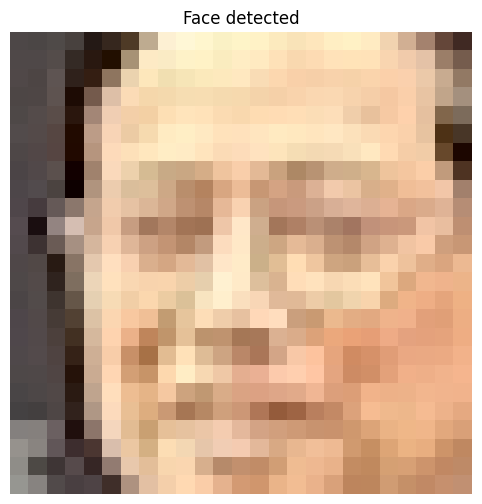

{'r': 80, 'c': 128, 'width': 28, 'height': 28}


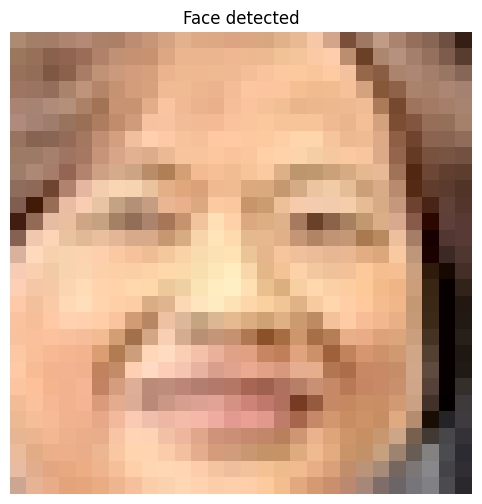

{'r': 50, 'c': 913, 'width': 36, 'height': 36}


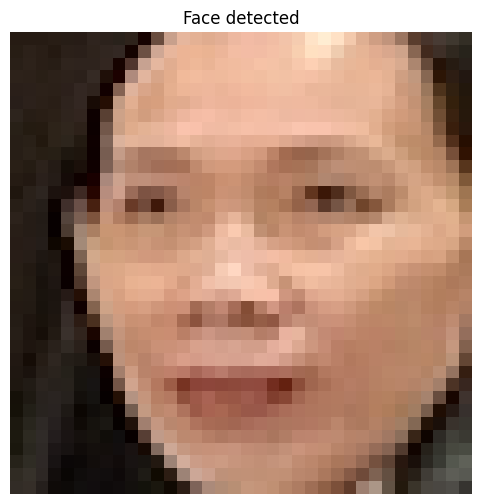

In [12]:
friends_image = imread('./imgs/img_bt_4.6_2.png')[:,:,:3]

# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(1, 1),
                                       max_size=(1000, 1000))

# Show detected faces
show_detected_face(friends_image, detected)

Bài tập 4.7: Phân đoạn và phát hiện khuôn mặt
- Câu hỏi: Hãy thực hiện phân đoạn khuôn mặt bằng kỹ thuật siêu điểm ảnh. Sau đó dùng những siêu điểm ảnh này để thực thi bài toán phát hiện khuôn mặt. Hãy đánh giá kết quả thực thi và thời gian thực thi để so sánh đóng góp của kỹ thuật siêu điểm ảnh vào bài toán phát hiện khuôn mặt.


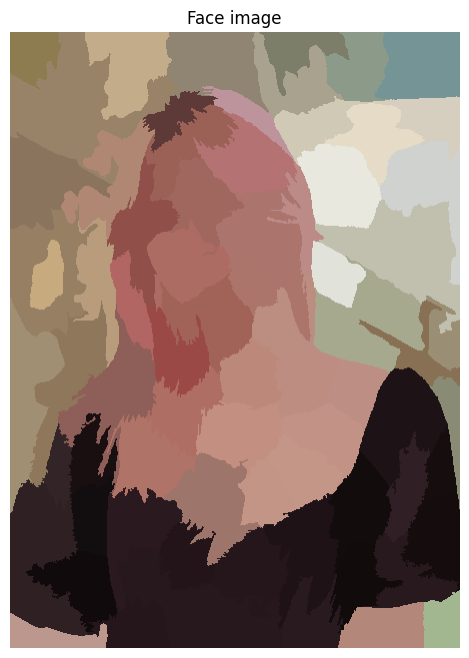

In [28]:
from skimage.segmentation import slic
from skimage.color import label2rgb

profile_image = imread('./imgs/img_bt_4.5_4.png')[:, :, :3]

# Obtain the segmentation with default 100 regions
segments = slic(profile_image, n_segments=100)

# Obtain segmented image using label2rgb
segmented_image = label2rgb(segments, profile_image, kind='avg')

# Detect the faces with multi scale method
detected = detector.detect_multi_scale(img=segmented_image, 
                                       scale_factor=1.01,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(1000, 1000))

# Show the detected faces
show_detected_face(segmented_image, detected)

Bài tập 4.8: Bảo vệ quyền riêng tư
- Câu hỏi: Trong bài tập này, ta sẽ phát hiện khuôn mặt trong ảnh và vì quyền riêng tư, sẽ ẩn dữ liệu bằng cách tự động làm mờ khuôn mặt của người trong ảnh. Có thể sử dụng bộ lọc Gaussian để làm mờ. Bộ nhận dạng khuôn mặt đã được khai báo sẵn với tên biến detector và tất cả các thư viện cần thiết đã được báo.

In [14]:
def getFaceRectangle(image, d):
    ''' Extracts the face from the image using the coordinates of the detected image '''
    # X and Y starting points of the face rectangle
    x, y = d['r'], d['c']

    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']

    # Extract the detected face
    face = image[x:width, y:height]
    return face

def mergeBlurryFace(original, gaussian_image):
    # X and Y starting points of the face rectangle
    x, y = d['r'], d['c']
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']

    original[x:width, y:height] = gaussian_image
    return original

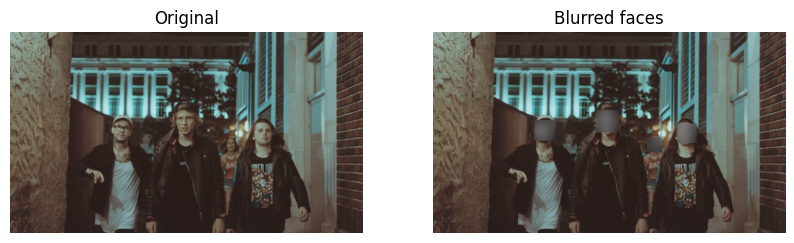

In [15]:
from skimage.filters import gaussian

group_image = imread('./imgs/img_bt_4.8_1.png')[:,:,:3]
group_image_o = group_image.copy()

# Detect the faces
detected = detector.detect_multi_scale(img=group_image, scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10), max_size=(100, 100))

# For each detected face
for d in detected:
    # Obtain the face rectangle from detected coordinates
    face = getFaceRectangle(group_image, d)

    # Apply gaussian filter to extracted face
    blurred_face = gaussian(face, sigma=8, preserve_range=True)

    # Merge this blurry face to our final image and show it
    resulting_image = mergeBlurryFace(group_image, blurred_face)

plot_comparison(group_image_o, resulting_image, 'Blurred faces')

Bài tập 4.9:  Trong bài tập này, hãy phục hồi một bức ảnh bị hư hỏng rất nặng. Bức ảnh này đã bị làm hỏng do nhiễu, biến dạng và thiếu thông tin do dữ liệu bị lỗi. 

In [16]:
def get_mask(image):
    # Create mask with three defect regions: left, middle, right respectively
    mask_for_solution = np.zeros(image.shape[:-1])
    mask_for_solution[450:475, 470:495] = 1
    mask_for_solution[320:355, 140:175] = 1
    mask_for_solution[130:155, 345:370] = 1
    return mask_for_solution

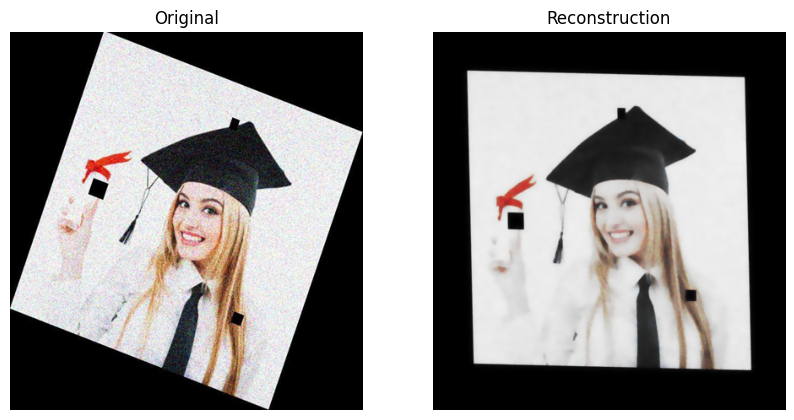

In [17]:
from skimage.restoration import denoise_tv_chambolle, inpaint
from skimage import transform

damaged_image = imread('./imgs/img_bt_4.9_1.png')[:, :, :3]

# Transform the image so it's not rotate
upright_img = transform.rotate(damaged_image, 20)

# Remove noise from the image, using the chambolle method
upright_img_without_noise = denoise_tv_chambolle(
    upright_img, weight=0.1)

# Reconstruct the image missing parts
mask = get_mask(upright_img)
result = inpaint.inpaint_biharmonic(
    upright_img_without_noise, mask, channel_axis=-1)

# Show the resulting image
plot_comparison(damaged_image, result, "Reconstruction")

### CÂU HỎI KIỂM TRA ĐÁNH GIÁ

Câu 4.1: Trong lệnh skimage.feature.canny(), các tham số high_threshold đóng vai trò gì? Hãy viết một đoạn mã để chứng minh kết luận vừa nêu.
- high_threshold là giới hạn trên cho ngưỡng trễ (liên kết các cạnh). Nếu Không đặt giá trị high_threshold, high_threshold được đặt thành 20% mức tối đa của dtype.

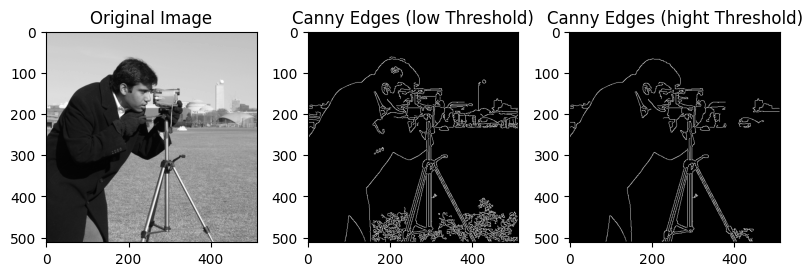

In [18]:
import matplotlib.pyplot as plt
from skimage import data, feature
image = data.camera()
edges_low_high_threshold = feature.canny(image, high_threshold=100)
edges_hight_high_threshold = feature.canny(image, high_threshold=200)
plt.figure(figsize=(8, 3))
plt.subplot(131)
plt.imshow(image, cmap=plt.cm.gray)
plt.title("Original Image")
plt.subplot(132)
plt.imshow(edges_low_high_threshold, cmap=plt.cm.gray)
plt.title("Canny Edges (low Threshold)")
plt.subplot(133)
plt.imshow(edges_hight_high_threshold, cmap=plt.cm.gray)
plt.title("Canny Edges (hight Threshold)")
plt.tight_layout()
plt.show()

Câu 4.2: Trong lệnh skimage.feature.corner_harris(), tham số k đóng vai trò gì? Hãy viết một đoạn mã để chứng minh kết luận vừa nêu.
- K là hệ số độ nhạy để tách các góc khỏi các cạnh, thường nằm trong phạm vi [0, 0,2]. Giá trị nhỏ của k dẫn đến việc phát hiện các góc nhọn.

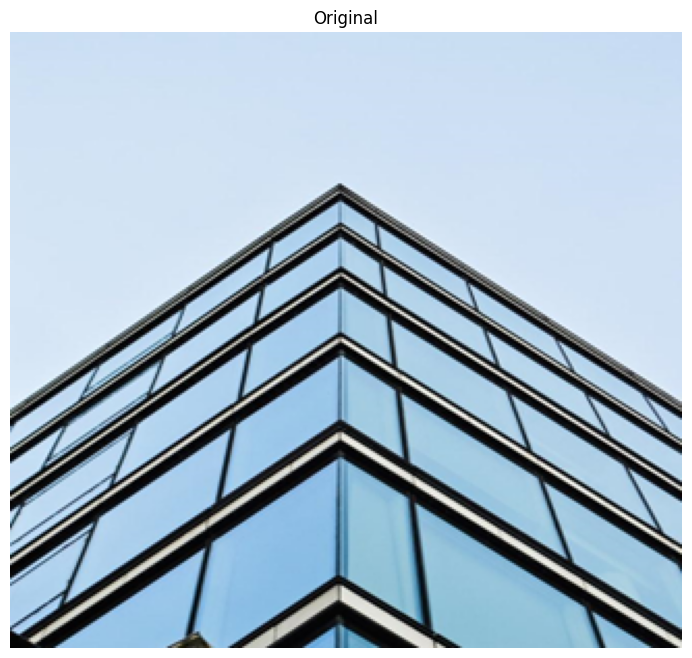

In [19]:
from skimage.feature import corner_harris, corner_peaks

building_image = imread('./imgs/img_bt_4.3_1.png')[:, :, :3]

# Convert image from RGB to grayscale
building_image_gray = rgb2gray(building_image)

# Apply the detector to measure the possible corners
measure_image_1 = corner_harris(building_image_gray, k=0.05)
measure_image_2 = corner_harris(building_image_gray, k=0.1)

# Find the peaks of the corners using the Harris detector
coords_1 = corner_peaks(measure_image_1, min_distance=20)
coords_2 = corner_peaks(measure_image_2, min_distance=20)

# Show original and resulting image with corners detected
show_image(building_image, 'Original')

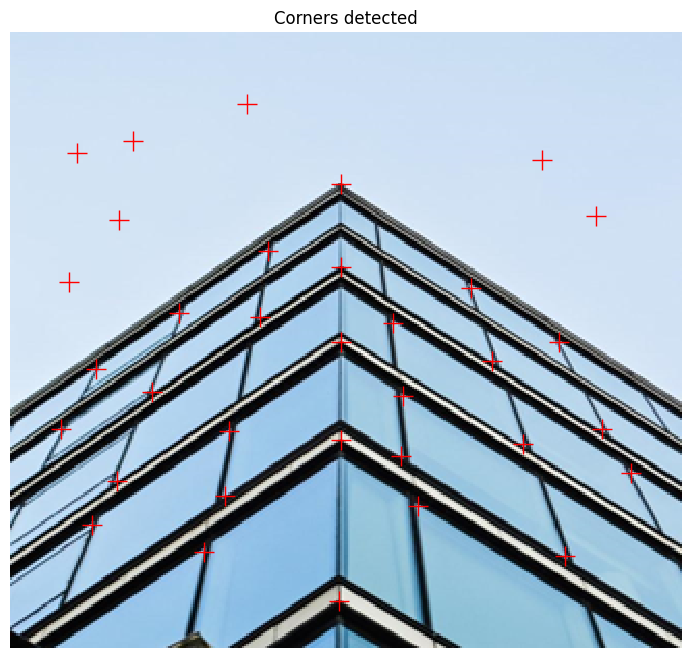

In [20]:
show_image_with_corners(building_image, coords_1)

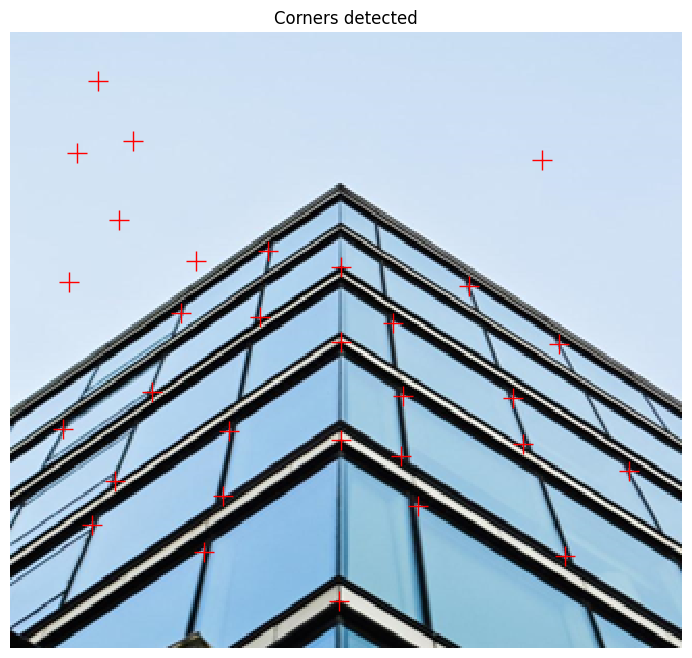

In [21]:
show_image_with_corners(building_image, coords_2)

Câu 4.3: Tham số threshold_rel, min_distance của lệnh skimage.feature.corner_peaks() có tác dụng gì? Hãy viết một đoạn mã để chứng minh kết luận vừa nêu.
- min_distance là Khoảng cách tối thiểu cho phép phân tách các đỉnh.
- threshold_rel là Cường độ tối thiểu của các đỉnh, được tính bằng max(hình ảnh) * ngưỡng_rel.

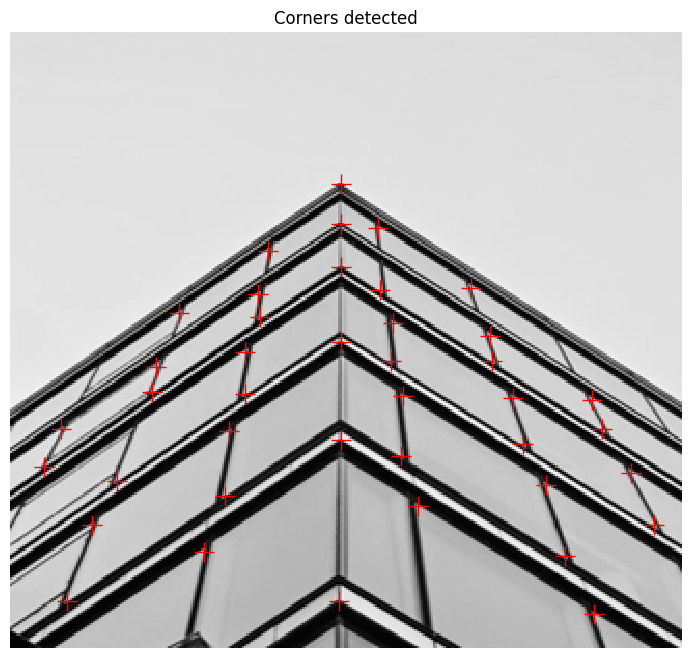

In [22]:
from skimage.feature import corner_peaks

# Read the image and convert it to grayscale
image = imread('./imgs/img_bt_4.3_1.png')[:, :, :3]
image = rgb2gray(image)

# Use corner_peaks to detect corners
threshold_rel = 0.1  # Relative threshold
min_distance = 10    # Minimum distance between corners

corners = corner_peaks(corner_harris(
    image), threshold_rel=threshold_rel, min_distance=min_distance)

# Plot the corners on the original image
show_image_with_corners(image, corners)

Câu 4.4: Tham số window_width, window_height của lệnh skimage.feature.Cascade() có tác dụng gì? Hãy viết một đoạn mã để chứng minh kết luận vừa nêu.
- window_width là chiều rộng của cửa sổ phát hiện được sử dụng. Không thể phát hiện các đối tượng nhỏ hơn cửa sổ này.
- window_height là chiều cao của cửa sổ phát hiện.

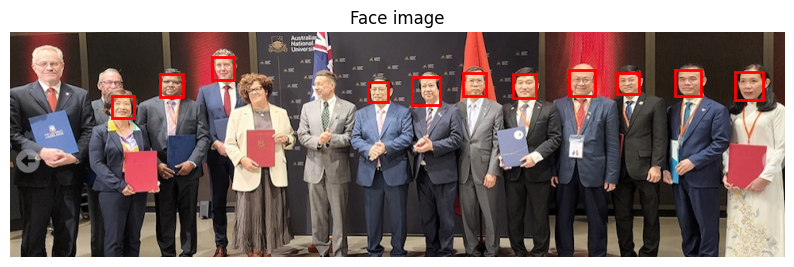

{'r': 32, 'c': 254, 'width': 28, 'height': 28}


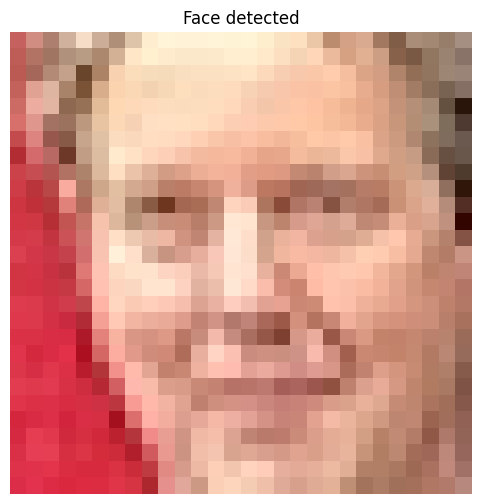

{'r': 48, 'c': 838, 'width': 33, 'height': 33}


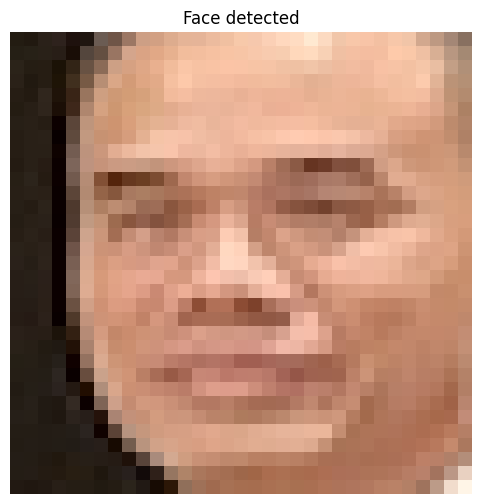

{'r': 48, 'c': 704, 'width': 33, 'height': 33}


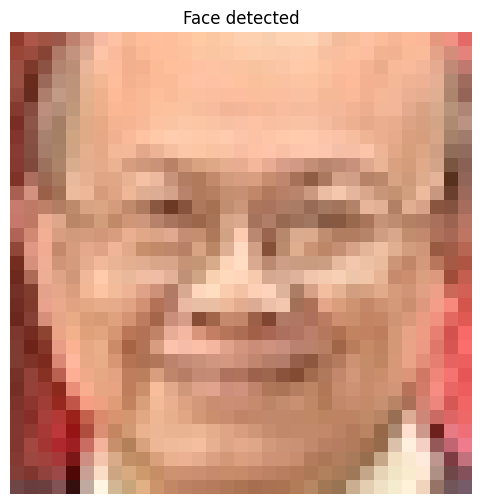

{'r': 51, 'c': 765, 'width': 27, 'height': 27}


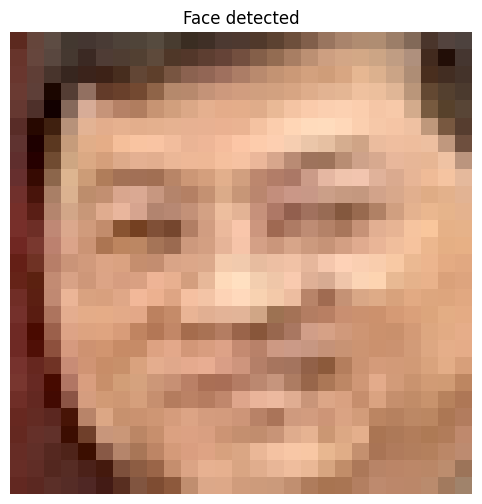

{'r': 51, 'c': 571, 'width': 29, 'height': 29}


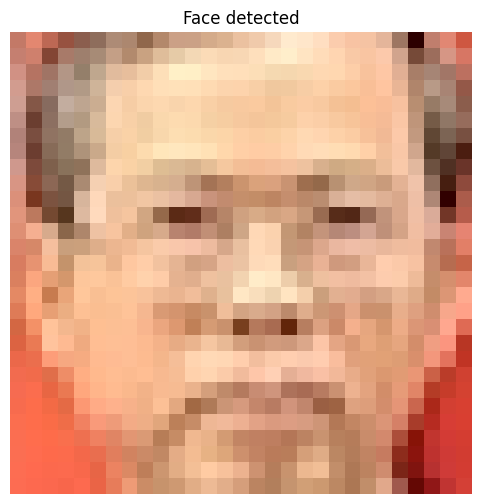

{'r': 53, 'c': 188, 'width': 29, 'height': 29}


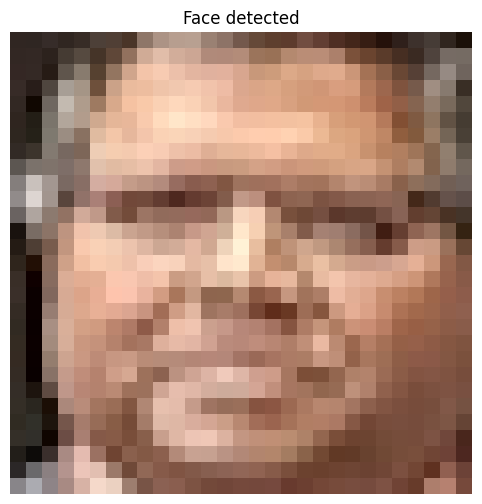

{'r': 53, 'c': 633, 'width': 30, 'height': 30}


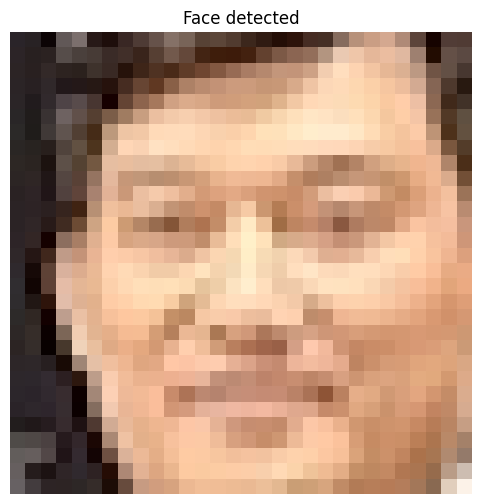

{'r': 56, 'c': 506, 'width': 36, 'height': 36}


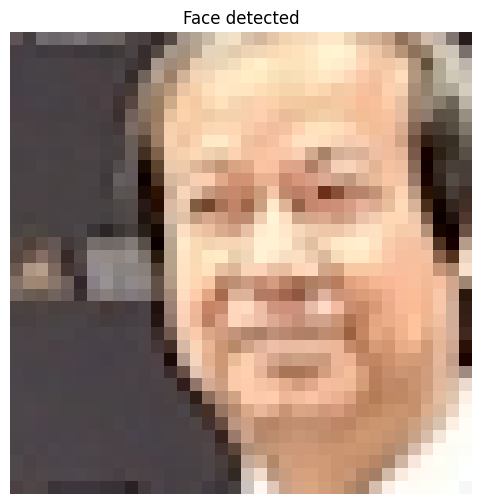

{'r': 63, 'c': 451, 'width': 25, 'height': 25}


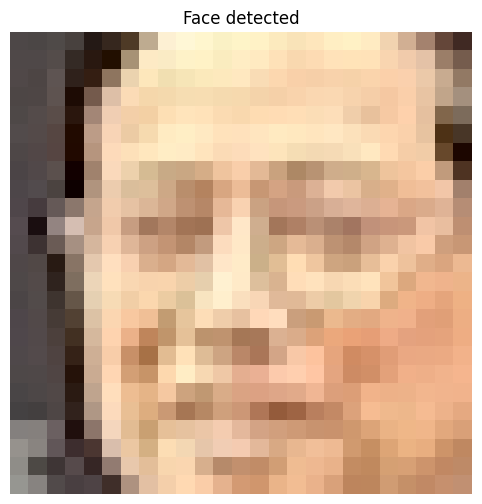

{'r': 80, 'c': 128, 'width': 28, 'height': 28}


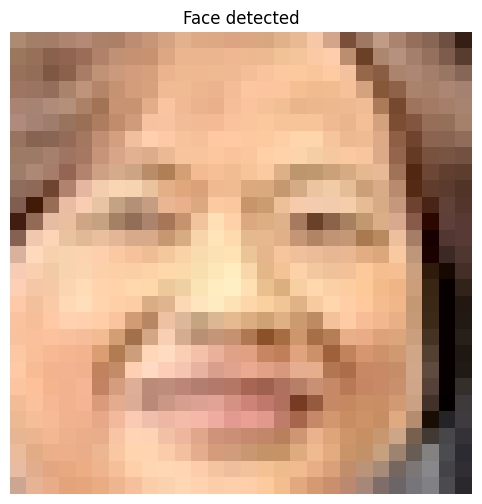

{'r': 50, 'c': 913, 'width': 36, 'height': 36}


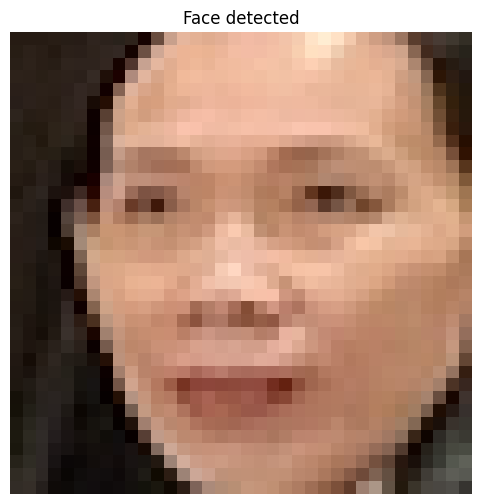

In [23]:
from skimage import data
from skimage.feature import Cascade

friends_image = imread("./imgs/img_bt_4.6_2.png")[:,:,:3]
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()
# Initialize the detector cascade
detector = Cascade(trained_file)
window_width_min = 10
window_height_min = 10
window_width_max = 500
window_height_max = 500
# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image, scale_factor=1.2,
                                       step_ratio=1, min_size=(window_width_min, window_height_min), max_size=(window_width_max, window_height_max))
# Show the detected faces
show_detected_face(friends_image, detected)

Câu 4.5: Hãy sử dụng điện thoại quay video các bạn trong lớp, sau đó thực hiện phát hiện khuôn mặt trong video

In [30]:
import cv2
from skimage import data
from skimage.feature import Cascade

trained_file = data.lbp_frontal_face_cascade_filename()

detector = Cascade(trained_file)

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open video file.")
    exit()

while True:
    ret, frame = cap.read()

    if not ret:
        print("Error: Failed to read frame.")
        break
    
    detected = detector.detect_multi_scale(img=frame, 
                                           scale_factor=1.2,
                                           step_ratio=1.1, 
                                           min_neighbor_number=10, 
                                           min_size=(125, 125), 
                                           max_size=(500, 500), 
                                           intersection_score_threshold = 0.6)
    if detected != []:
        for ddta in detected:
            y = ddta["r"]
            x = ddta["c"]
            w = ddta["width"]
            h = ddta["height"]
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    cv2.imshow('Video', frame)

    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [25]:
def crop_face_dts(frame, dis, title="Face detected"):
    x, y, w, h = dis
    crop = frame[y:y+h, x:w+x]
    cv2.imshow(title,crop)

In [26]:
import cv2
import threading

face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_faces(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(
        gray, scaleFactor=1.1, minNeighbors=5, minSize=(160, 160))
    # print(faces)
    for idx,(x, y, w, h) in enumerate(faces):
        # print(idx)
        crop_face_dts(frame, (x, y, w, h), title="persion_" + str(idx))
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    return frame

def process_frames():
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        processed_frame = detect_faces(frame)
        cv2.imshow('Face Detection', processed_frame)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

cap = cv2.VideoCapture("./videos/video_2.mp4")

if not cap.isOpened():
    print("Error: Could not open video file.")
    exit()

thread = threading.Thread(target=process_frames)
thread.start()

thread.join()

cap.release()
cv2.destroyAllWindows()